# Simple sampling problem : Berlemont Kevin

## Sampling discrete distributions

First we need to generate a discrete distributions of $n_{item} = 5$ elements, each weights is generated from a random uniform distribution. We will add that this distribution will be normalized.

In [2]:
import random                    
import numpy                     
import math                       
import time                      
import operator                   
import pylab    
import matplotlib.pyplot as plt
%matplotlib inline

n_item = 5

#First of all : generate the random distribution
Normalization = 0
Proba = []
for i in range(n_item):
    Proba.append(random.uniform(0,1))
    Normalization=Normalization+Proba[i]

# Now we normalize the distribution
for i in range(n_item):
    Proba[i]=Proba[i]/Normalization      

#Some graphical informations
print ("i   Prob(i)   ")
for i in range(n_item):
    print (i, ' ',Proba[i])
    

i   Prob(i)   
0   0.27522217330013554
1   0.42793427564866465
2   0.021658910487006345
3   0.19501755889598757
4   0.0801670816682058


Now that we have define our distribution, we can write the "accept/reject" procedure. The goal is to sample from the distribution.

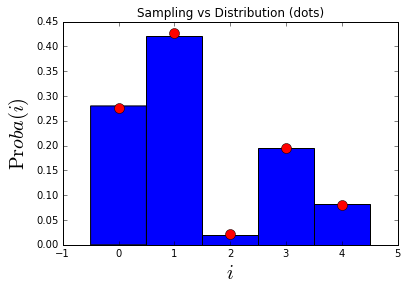

In [3]:
def sample_AR(proba,valeu_max,N):
    # N will be n_item
    ok=False
    prob=0
    while ok==False :
        # Definition of the several squares
        x = random.uniform(0,N)
        y = random.uniform(0,valeu_max)
        prob = int(math.floor(x))
        if proba[prob]>y :
            ok=True   
    
    return prob

# Computing the max value with help of operator module
index, valeur_max = max(enumerate(Proba), key=operator.itemgetter(1)) 


list_proba =[]
for i in range(10000):
    list_proba.append(sample_AR(Proba,valeur_max,n_item))
       
# Ploting the histogram and theoritical proportions
x = [a for a in range(n_item)]
y = [Proba[a] for a in range(n_item)]
pylab.figure()
pylab.hist(list_proba, bins=n_item, range=(-0.5, n_item-0.5), normed=True)
pylab.plot(x, y,'ro', ms=10)
pylab.title("Sampling vs Distribution (dots)")
pylab.xlabel('$i$',fontsize=20)
pylab.ylabel('$\Proba(i)$',fontsize=20)
pylab.show()

We can note that the histogram fits very well the theoritical distributions. This can be a sort of proof that our AR procedure is working.

Now we want to implement another kind of procedure : the Tower Sampling. First of all we will need to compute : $P(x < i)$, the cumulative function.

In [4]:
cumu = [0.0] # Cumulative function
for l in range(n_item):
    cumu.append(cumu[l] + Proba[l])    
    
    
#Some graphical illustrations

print ("i   Prob(i)               Prob<i")
for i in range(n_item):
    print (i, ' ',Proba[i], ' ', cumu[i])

i   Prob(i)               Prob<i
0   0.27522217330013554   0.0
1   0.42793427564866465   0.27522217330013554
2   0.021658910487006345   0.7031564489488003
3   0.19501755889598757   0.7248153594358065
4   0.0801670816682058   0.9198329183317941


Now we can code the TS procedure.

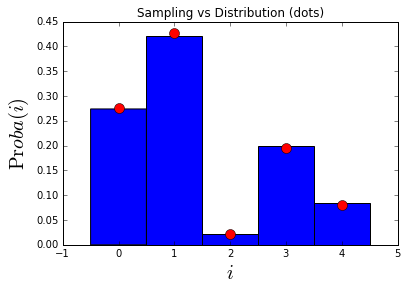

In [5]:
#Procedure in order to achieve the research of the corresponding i
def research(x, cumulative):
    kmin = 0
    kmax = len(cumulative)
    while True:
        k = int((kmin + kmax) / 2)
        if cumulative[k] < x:
            kmin = k
        elif cumulative[k - 1] > x:
            kmax = k
        else:
            return k - 1
        
        
        
def sample_TS(cumulative):
    x = random.random() 
    sample = research(x, cumulative)
    return sample

list_proba2 =[]
for i in range(10000):
    list_proba2.append(sample_TS(cumu))

#Graphical stuff
x = [a for a in range(n_item)]
y = [Proba[a] for a in range(n_item)]
pylab.figure()
pylab.hist(list_proba2, bins=n_item, range=(-0.5, n_item-0.5), normed=True)
pylab.plot(x, y,'ro', ms=10)
pylab.title("Sampling vs Distribution (dots)")
pylab.xlabel('$i$',fontsize=20)
pylab.ylabel('$\Proba(i)$',fontsize=20)
pylab.show()

Like with the AR procedure, the sampling seems to work fine. We want now to compute and compare the time used by the two procedures. 

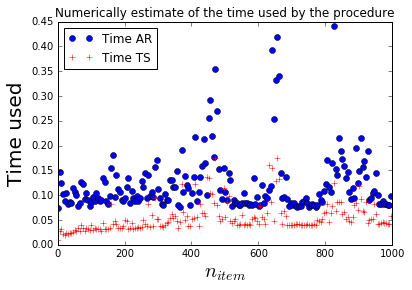

In [148]:
n_item = numpy.arange(1,1000,5)
time_ar = numpy.zeros(len(n_item))
time_ts = numpy.zeros(len(n_item))


for i,N in enumerate(n_item):
    
    Normalization = 0
    Proba = []
    for j in range(N):
       Proba.append(random.uniform(0,1))
       Normalization=Normalization+Proba[j]

# Now we normalize the distribution
    for j in range(N):
       Proba[j]=Proba[j]/Normalization      
    
    
    cumu = [0.0] 
    for l in range(N):
        cumu.append(cumu[l] + Proba[l])   
    
    # Computing the max value with help of operator module
    index, valeur_max = max(enumerate(Proba), key=operator.itemgetter(1)) 
    start = time.time()
    list_proba =[]
    for j in range(10000):
        list_proba.append(sample_AR(Proba,valeur_max,N))
    end = time.time()
    time_ar[i] =(end - start)
    
    start = time.time()
    list_proba =[]
    for j in range(10000):
        list_proba.append(sample_TS(cumu))
    end = time.time()
    time_ts[i] = (end - start)
      

plt.plot(n_item,time_ar,'bo',label='Time AR uniform')
plt.xlabel('$n_{item}$',fontsize=20)
plt.ylabel('Time used',fontsize=20)
plt.plot(n_item,time_ts,'r+',label='Time TS uniform')
plt.legend(loc=2)
plt.title('Numerically estimate of the time used by the procedure')
plt.show()
    

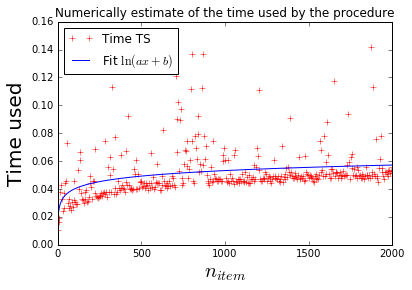

In [8]:
from scipy.optimize import curve_fit

def func (x,a,b,c):
    return a*numpy.log(b*x+c)
popt, pcov = curve_fit(func, n_item, time_ts)

plt.xlabel('$n_{item}$',fontsize=20)
plt.ylabel('Time used',fontsize=20)
plt.plot(n_item,time_ts,'r+',label='Time TS')
plt.plot(n_item,func(n_item,popt[0],popt[1],popt[2]),label='Fit $\ln(ax+b) $')
plt.legend(loc=2)
plt.title('Numerically estimate of the time used by the procedure')
plt.show()
    

We can note that in the case of AR procedure, the time used seems to be a constant function of $n_{item}$. However for the TS procedure it seems to act like $\log$. However the procedure TS is faster thant the procedure AR even for large $n_{item}$ ebcause the $\log$ scaling is very slow. If we wait until a very large $n_{item}$, close to infinity, it would be better to use the procedure AR. 

### Why do we have this difference ?

If $n_{item}$ is increasing, the rejection area in the procedure AR is constant because we have troncated our AR procedure with the maximal height of the boxes.  That's why we don't have an increase of time needed, because. For the procedure TS, we don't have this rejection area, because the box shape a tower, but we need to check all the possible box. The complexity of the *procedure TS* is the one of the *procedure "research"*. We were using a method called : ** bisection method **, with complexity $O(\ln(n_{item}))$. That's why we have an increase of time needed in this case, which can be fit by this function.

The goal now is to observe the several behavior of $T_{used}$ for the AR procedure if we change the initial distribution. For this we will use a method of generation called : **inverse cumulative method**.

### Exponential Distribution

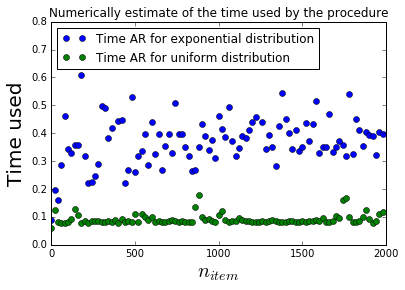

In [149]:
# Exponential distribution

n_item = numpy.arange(1,2000,20)
time_ar = numpy.zeros(len(n_item))
time_ts = numpy.zeros(len(n_item))
time_ar1= numpy.zeros(len(n_item))

for i,N in enumerate(n_item):
    
    Normalization = 0
    Proba = []
    for j in range(N):
       Proba.append(-numpy.log(random.uniform(0,1)))
       Normalization=Normalization+Proba[j]

# Now we normalize the distribution
    for j in range(N):
       Proba[j]=Proba[j]/Normalization      
    
    
    cumu = [0.0] 
    for l in range(N):
        cumu.append(cumu[l] + Proba[l])   
    
    # Computing the max value with help of operator module
    index, valeur_max = max(enumerate(Proba), key=operator.itemgetter(1)) 
    start = time.time()
    list_proba =[]
    for j in range(10000):
        list_proba.append(sample_AR(Proba,valeur_max,N))
    end = time.time()
    time_ar[i] =(end - start)
    
    #start = time.time()
    #list_proba =[]
    #for j in range(5000):
    #    list_proba.append(sample_TS(cumu))
    #end = time.time()
    #time_ts[i] = (end - start)

    
   
for i,N in enumerate(n_item):
    
    Normalization = 0
    Proba2 = []
    for j in range(N):
       Proba2.append(random.uniform(0,1))
       Normalization=Normalization+Proba2[j]

# Now we normalize the distribution
    for j in range(N):
       Proba2[j]=Proba2[j]/Normalization      
    
    
       
    index, valeur_max = max(enumerate(Proba2), key=operator.itemgetter(1))     
    start = time.time()
    list_proba2 =[]
    for j in range(10000):
        list_proba2.append(sample_AR(Proba2,valeur_max,N))
    end = time.time()
    time_ar1[i] =(end - start)
    



plt.figure(2)
plt.plot(n_item,time_ar,'bo',label='Time AR for exponential distribution')
plt.plot(n_item,time_ar1,'go',label='Time AR for uniform distribution')
plt.xlabel('$n_{item}$',fontsize=20)
plt.ylabel('Time used',fontsize=20)
plt.legend(loc=2)
plt.title('Numerically estimate of the time used by the procedure')
plt.show()

We can observe that for small $n_{item}$ the time used is comparable but as soon as we increase the value the time used is constant but different values for the two distributions. It's longer for the exponential distribution than for the uniform one. 

Now we will try to understand why ? First we plot the accpetance and rejection area for several values of $n_{item}$.


Percentage of rejection : exponetial distribution and N =  1  : 
 0.0
Percentage of rejection : uniform distribution and N =  1  : 
 0.0


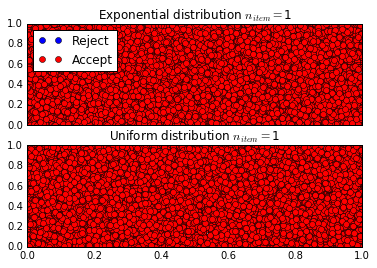

Percentage of rejection : exponetial distribution and N =  201  : 
 0.7457540933590969
Percentage of rejection : uniform distribution and N =  201  : 
 0.5409264105036037


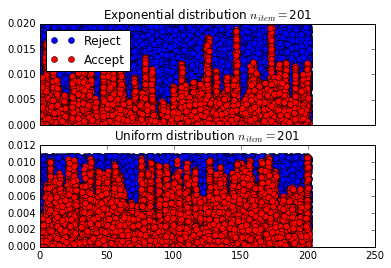

Percentage of rejection : exponetial distribution and N =  401  : 
 0.8691390659146525
Percentage of rejection : uniform distribution and N =  401  : 
 0.5079950799507995


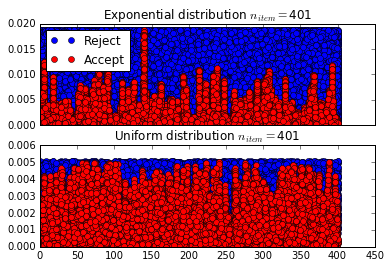

Percentage of rejection : exponetial distribution and N =  601  : 
 0.8984183740844955
Percentage of rejection : uniform distribution and N =  601  : 
 0.5171181611859578


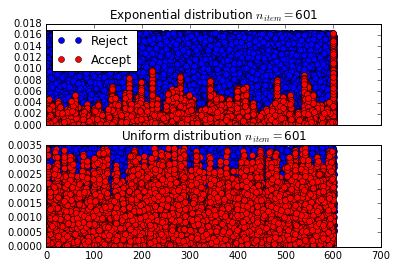

Percentage of rejection : exponetial distribution and N =  801  : 
 0.8648831239021754
Percentage of rejection : uniform distribution and N =  801  : 
 0.5120761161258843


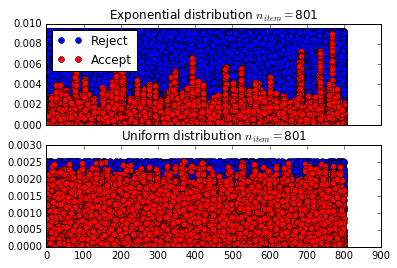

In [55]:
def sample_AR_new(proba,valeu_max,N,x_rate,y_rate,x_reussi,y_reussi):
    # N will be n_item
    ok=False
    xr=0
    
    while ok==False :
        # Definition of the several squares
        x = random.uniform(0,N)
        y = random.uniform(0,valeu_max)
        xr = int(math.floor(x))
        if proba[xr]>y :
            ok=True   
            x_reussi.append(x)
            y_reussi.append(y)
        else :
            x_rate.append(x)
            y_rate.append(y)
    return xr

# Plotting the are of accpetance and rejection
n_item = numpy.arange(1,1000,200)


x_reussi_list = []
x_rate_list = []
y_reussi_list=[]
y_rate_list = []
x_reussi_uni_list=[]
x_rate_uni_list = []
y_reussi_uni_list = []
y_rate_uni_list = []

for i,N in enumerate(n_item):
    x_reussi = []
    y_reussi = []
    x_rate = []
    y_rate = []
    Normalization = 0
    Proba = []
    for j in range(N):
       Proba.append(-numpy.log(random.uniform(0,1)))
       Normalization=Normalization+Proba[j]

# Now we normalize the distribution
    for j in range(N):
       Proba[j]=Proba[j]/Normalization      
    
    
    cumu = [0.0] 
    for l in range(N):
        cumu.append(cumu[l] + Proba[l])   
    
    # Computing the max value with help of operator module
    index, valeur_max = max(enumerate(Proba), key=operator.itemgetter(1)) 
   
    list_proba =[]
    for j in range(10000):
        list_proba.append(sample_AR_new(Proba,valeur_max,N,x_rate,y_rate,x_reussi,y_reussi))
    x_reussi_list.append(x_reussi)
    y_reussi_list.append(y_reussi)
    y_rate_list.append(y_rate)
    y_reussi_list.append(y_reussi)
    
 
    x_reussi_uni = []
    y_reussi_uni = []
    x_rate_uni = []
    y_rate_uni = []
    
    Normalization = 0
    Proba2 = []
    for j in range(N):
       Proba2.append(random.uniform(0,1))
       Normalization=Normalization+Proba2[j]

# Now we normalize the distribution
    for j in range(N):
       Proba2[j]=Proba2[j]/Normalization      
    
    
       
    index, valeur_max = max(enumerate(Proba2), key=operator.itemgetter(1))     
    
    list_proba2 =[]
    for j in range(10000):
        list_proba2.append(sample_AR_new(Proba2,valeur_max,N,x_rate_uni,y_rate_uni,x_reussi_uni,y_reussi_uni))
    
    x_reussi_uni_list.append(x_reussi_uni)
    y_reussi_uni_list.append(y_reussi_uni)
    y_rate_uni_list.append(y_rate_uni)
    y_reussi_uni_list.append(y_reussi_uni)

  
    
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(x_rate,y_rate,'bo',label='Reject')
    axarr[0].plot(x_reussi,y_reussi,'ro',label='Accept')
    axarr[0].set_title('Exponential distribution $n_{item} = $'+ str(N))
    axarr[1].set_title('Uniform distribution $n_{item} = $'+ str(N))
    axarr[1].plot(x_rate_uni,y_rate_uni,'bo')
    axarr[1].plot(x_reussi_uni,y_reussi_uni,'ro')
    axarr[0].legend(loc=2)
    print('Percentage of rejection : exponetial distribution and N = ',N,' : \n',len(x_rate)/(len(x_rate)+len(x_reussi)))    
    print('Percentage of rejection : uniform distribution and N = ',N,' : \n',len(x_rate_uni)/(len(x_rate_uni)+len(x_reussi_uni)))  
    plt.show()





As we can see the rejection probability increases with $n_{item}$ for the exponential distribution but seems to remain constant for uniform distribution. This can be explain by the fac that for the exponential distribution we can have higher probability compare to the other distributions, and this increases the rejection area. The next graph will highlight this phaenomen.

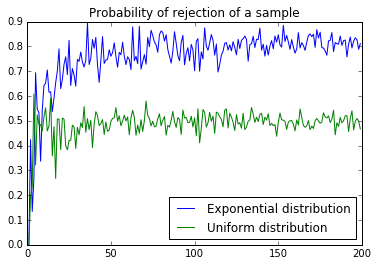

In [151]:
def sample_AR_new(proba,valeu_max,N,x_rate,y_rate,x_reussi,y_reussi):
    # N will be n_item
    ok=False
    xr=0
    
    while ok==False :
        # Definition of the several squares
        x = random.uniform(0,N)
        y = random.uniform(0,valeu_max)
        xr = int(math.floor(x))
        if proba[xr]>y :
            ok=True   
            x_reussi.append(x)
            y_reussi.append(y)
        else :
            x_rate.append(x)
            y_rate.append(y)
    return xr

# Plotting the are of accpetance and rejection
n_item = numpy.arange(1,200,1)
prob_exp = []
prob_uni = []


for i,N in enumerate(n_item):
    x_reussi = []
    y_reussi = []
    x_rate = []
    y_rate = []
    Normalization = 0
    Proba = []
    for j in range(N):
       Proba.append(-numpy.log(random.uniform(0,1)))
       Normalization=Normalization+Proba[j]

# Now we normalize the distribution
    for j in range(N):
       Proba[j]=Proba[j]/Normalization      
    
    
    cumu = [0.0] 
    for l in range(N):
        cumu.append(cumu[l] + Proba[l])   
    
    # Computing the max value with help of operator module
    index, valeur_max = max(enumerate(Proba), key=operator.itemgetter(1)) 
    #start = time.time()
    list_proba =[]
    for j in range(10000):
        list_proba.append(sample_AR_new(Proba,valeur_max,N,x_rate,y_rate,x_reussi,y_reussi))
        
    prob_exp.append(len(x_rate)/(len(x_rate)+len(x_reussi)))
    x_reussi_uni = []
    y_reussi_uni = []
    x_rate_uni = []
    y_rate_uni = []
    
    Normalization = 0
    Proba2 = []
    for j in range(N):
       Proba2.append(random.uniform(0,1))
       Normalization=Normalization+Proba2[j]

# Now we normalize the distribution
    for j in range(N):
       Proba2[j]=Proba2[j]/Normalization      
    
    
       
    index, valeur_max = max(enumerate(Proba2), key=operator.itemgetter(1))     
    
    list_proba2 =[]
    for j in range(10000):
        list_proba2.append(sample_AR_new(Proba2,valeur_max,N,x_rate_uni,y_rate_uni,x_reussi_uni,y_reussi_uni))
    
    prob_uni.append(len(x_rate_uni)/(len(x_rate_uni)+len(x_reussi_uni)))

  
    
plt.plot(n_item,prob_exp,label='Exponential distribution')
plt.plot(n_item,prob_uni,label='Uniform distribution')
plt.title('Probability of rejection of a sample')
plt.legend(loc=4)
plt.show()



As we can observe the probability increases with $n_{item}$ and stays constant after some time. The difference between the two vlaues explain the difference between the time used. And that's explain why we seems to have the same time used for small $n_{item}$.

##### Difference wtih TS sampling

Now we observe the difference between AR method and TS method for the exponential distribution.

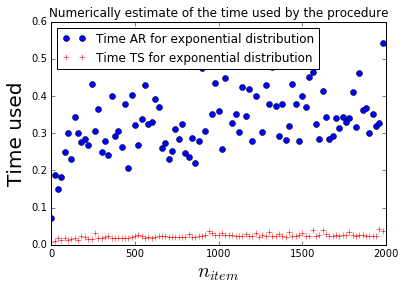

In [64]:

n_item = numpy.arange(1,2000,20)
time_ar = numpy.zeros(len(n_item))
time_ts = numpy.zeros(len(n_item))


for i,N in enumerate(n_item):
    
    Normalization = 0
    Proba = []
    for j in range(N):
       Proba.append(-numpy.log(random.uniform(0,1)))
       Normalization=Normalization+Proba[j]

# Now we normalize the distribution
    for j in range(N):
       Proba[j]=Proba[j]/Normalization      
    
    
    cumu = [0.0] 
    for l in range(N):
        cumu.append(cumu[l] + Proba[l])   
    
    # Computing the max value with help of operator module
    index, valeur_max = max(enumerate(Proba), key=operator.itemgetter(1)) 
    start = time.time()
    list_proba =[]
    for j in range(10000):
        list_proba.append(sample_AR(Proba,valeur_max,N))
    end = time.time()
    time_ar[i] =(end - start)
    
    start = time.time()
    list_proba =[]
    for j in range(5000):
        list_proba.append(sample_TS(cumu))
    end = time.time()
    time_ts[i] = (end - start)

    



plt.figure(2)
plt.plot(n_item,time_ar,'bo',label='Time AR for exponential distribution')
plt.xlabel('$n_{item}$',fontsize=20)
plt.ylabel('Time used',fontsize=20)
plt.plot(n_item,time_ts,'r+',label='Time TS for exponential distribution')
plt.legend(loc=2)
plt.title('Numerically estimate of the time used by the procedure')
plt.show()

As for the uniform distribution, the TS procedure is faster than the AR one for the exponential distribution. However even if the time used for TS is increasing it remains a lot smaller than the one for AR procedure.

### Third distribution

Now we will sampling from the distribution (inverse cumulative method) :
$$ f(x) = \frac{1}{x^2}$$


[  9.63046913e-07   8.28197307e-04   6.13317895e-03]


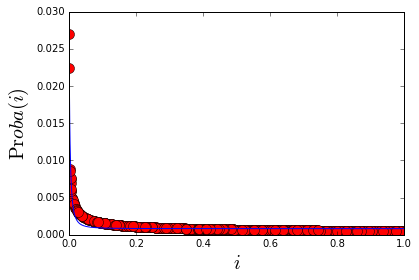

In [95]:
# -1/2 distribution


n_item = 1000

N=n_item

    
Normalization = 0
Proba = []
Uni = []
for j in range(N):
       Uni.append((random.uniform(0,1)))
       Proba.append((Uni[j]**(-1/2)))
       Normalization=Normalization+Proba[j]

# Now we normalize the distribution
for j in range(N):
       Proba[j]=Proba[j]/Normalization      
#numpy.sort(Uni)   
    
cumu = [0.0] 
for l in range(N):
        cumu.append(cumu[l] + Proba[l])   

        
CDFinv=lambda u: 1./(u**2)

def CDFinv (u,a,b,c):
    return a/((u+c)**2)+b
popt, pcov = curve_fit(CDFinv, Uni, Proba)
print (popt)
#Graphical stuff
x = numpy.linspace(0.001,1,1000)

y = [Proba[a] for a in range(n_item)]
pylab.figure()
pylab.plot(Uni, y,'ro', ms=10)
pylab.plot(x,CDFinv(x,popt[0],popt[1],popt[2]))
pylab.xlabel('$x$',fontsize=20)
pylab.ylabel('$\Proba(i)$',fontsize=20)
pylab.title('Distribution function')
pylab.show()

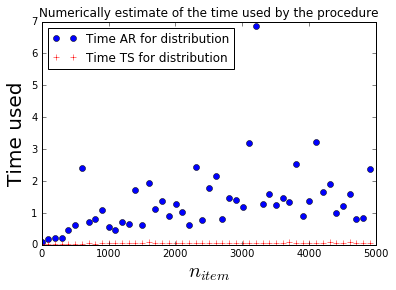

In [68]:
# -1/2 distribution


n_item = numpy.arange(1,5000,100)
time_ar = numpy.zeros(len(n_item))
time_ts = numpy.zeros(len(n_item))


for i,N in enumerate(n_item):
    
    Normalization = 0
    Proba = []
    for j in range(N):
       Proba.append(random.uniform(0,1)**(-1/2))
       Normalization=Normalization+Proba[j]

# Now we normalize the distribution
    for j in range(N):
       Proba[j]=Proba[j]/Normalization      
    
    
    cumu = [0.0] 
    for l in range(N):
        cumu.append(cumu[l] + Proba[l])   
    
    # Computing the max value with help of operator module
    index, valeur_max = max(enumerate(Proba), key=operator.itemgetter(1)) 
    start = time.time()
    list_proba =[]
    for j in range(10000):
        list_proba.append(sample_AR(Proba,valeur_max,N))
    end = time.time()
    time_ar[i] =(end - start)
    
    start = time.time()
    list_proba =[]
    for j in range(10000):
        list_proba.append(sample_TS(cumu))
    end = time.time()
    time_ts[i] = (end - start)

    



plt.figure(2)
plt.plot(n_item,time_ar,'bo',label='Time AR for distribution')
plt.xlabel('$n_{item}$',fontsize=20)
plt.ylabel('Time used',fontsize=20)
plt.plot(n_item,time_ts,'r+',label='Time TS for distribution')
plt.legend(loc=2)
plt.title('Numerically estimate of the time used by the procedure')
plt.show()

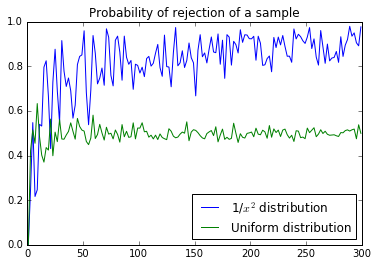

In [152]:
# Plotting the are of accpetance and rejection
n_item = numpy.arange(1,300,2)
#n_item=[8000]
prob_exp = []
prob_uni = []


for i,N in enumerate(n_item):
    x_reussi = []
    y_reussi = []
    x_rate = []
    y_rate = []
    Normalization = 0
    Proba = []
    for j in range(N):
       Proba.append(random.uniform(0,1)**(-1/2))
       Normalization=Normalization+Proba[j]

# Now we normalize the distribution
    for j in range(N):
       Proba[j]=Proba[j]/Normalization      
    
    
    cumu = [0.0] 
    for l in range(N):
        cumu.append(cumu[l] + Proba[l])   
    
    # Computing the max value with help of operator module
    index, valeur_max = max(enumerate(Proba), key=operator.itemgetter(1)) 
    #start = time.time()
    list_proba =[]
    for j in range(10000):
        list_proba.append(sample_AR_new(Proba,valeur_max,N,x_rate,y_rate,x_reussi,y_reussi))
        
    prob_exp.append(len(x_rate)/(len(x_rate)+len(x_reussi)))
    x_reussi_uni = []
    y_reussi_uni = []
    x_rate_uni = []
    y_rate_uni = []
    
    Normalization = 0
    Proba2 = []
    for j in range(N):
       Proba2.append(random.uniform(0,1))
       Normalization=Normalization+Proba2[j]

# Now we normalize the distribution
    for j in range(N):
       Proba2[j]=Proba2[j]/Normalization      
    
    
       
    index, valeur_max = max(enumerate(Proba2), key=operator.itemgetter(1))     
    
    list_proba2 =[]
    for j in range(10000):
        list_proba2.append(sample_AR_new(Proba2,valeur_max,N,x_rate_uni,y_rate_uni,x_reussi_uni,y_reussi_uni))
    
    prob_uni.append(len(x_rate_uni)/(len(x_rate_uni)+len(x_reussi_uni)))

  
    
plt.plot(n_item,prob_exp,label='1/$x^2$ distribution')
plt.plot(n_item,prob_uni,label='Uniform distribution')
plt.title('Probability of rejection of a sample')
plt.legend(loc=4)
plt.show()


As we could expect we have a behavior analog with this distribution and the exponential one because we have a pic in the distribution. However because the $1/x^2$ distribution is not as sharp a the exponential one, the transition for small $n_{item}$ is smoother than for the exponential one, but more noisy however.

### Conclusion

Because for some distributions we can have a large time used by the AR procedure, if the distribution is not uniform, in order to sample discrete distributions we should prefer the TS method.

## Sampling $\pi$ with direct sampling

If each point $i$ is sampled uniformly in the square, $P(S_i = 4) = \frac{\text{Area circle}}{\text{Area square}} = \frac{ \pi}{4} $. The mean of this discrete distribution will be :
$$ 0 \times P(S_i =0) + 4 \times P(S_i = 4) = \pi = m$$
The variance will be :
$$ P(S_i = 4) \times16 + 0 - (4 P(S_i = 4)- 0 )^2= 16 \times (P(4) - P(4)^2) = 4 \pi - \pi^2 = V$$

Thus we have, $V \simeq 2.7$

If we have $N$ random independent points. We are looking at the estimator :
$$ \hat m =\frac{1}{N} \sum S_i \quad \hat \Delta = \frac{1}{N} \sum S_i^2 - \hat m^2$$
The law of large numbers gives us the fact that $\hat m$ is an estimator of the mean. Moreover $E [\hat m] = \frac{1}{N} \sum E[S_i] = E[S_i] = m$. Thus, $\hat m$ is an unbiased estimator of the mean.


We have : $\hat \Delta = \frac{1}{N} \sum (S_i - \hat m)^2 $. Thus this is an estimator of the variance of $P(S)$ by the law of large numbers. However we have :

$$ n E [\hat \Delta] = \sum_i S_i^2 + n \hat m^2 - 2n \hat m^2   = n \Delta + n E^2[S_i] - n \times var(\hat m) - n E^2 [\hat m] $$
 $$ \Rightarrow n E [\hat \Delta] = (n-1) \Delta$$

This leads to :
$$ \hat \Delta = \frac{n-1}{n} \Delta \rightarrow_{\infty} \Delta $$
Thus we have an asymptotic unbiased estimator of the variance.


#### Variance of $\hat m$ : 

The variance of $\hat m$ will be :
$$ Var(\hat m) = Var(\frac{1}{N} \sum_i S_i) = \frac{1}{N^2} \sum_i Var(S_i) = \frac{Var(S_i)}{N}$$
The typical error, or standard error made by the estimator when using $N$ points to compute $\pi$ will be :
$$ error = \frac{\sqrt{Var(S_i)}}{\sqrt{N}} \simeq \frac{1.64}{\sqrt{N}}$$
Thus if we compute numerically on log-log scale we should obtain a strait line.

Direct Sampling of Pi
Runs       Number Hits Square  estimate of pi
0            3112               3.112
1            3112               3.112
2            3141               3.141
3            3152               3.152
4            3133               3.133


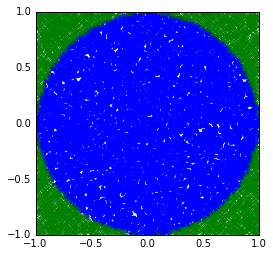

In [2]:
def direct_sampling(n,iter):
    
    data=[]
    print ('Direct Sampling of Pi')
    print ('Runs       Number Hits Square  estimate of pi')
    for jj in range(iter):
        nhits = 0
        for ii in range(n):
            x=random.uniform(-1,1)
            y=random.uniform(-1,1)
            if (x**2+y**2) < 1:
                nhits= nhits + 1
                data_inside_x.append(x)
                data_inside_y.append(y)
            else:
                data_outside_x.append(x)
                data_outside_y.append(y)
        print (str(jj)+'            '+str(nhits)+'               '+str(4.0*nhits/n))
        data.append([jj,nhits])
    return data  

iter=5
n=4000
data_inside_x = []
data_inside_y = []
data_outside_x = []
data_outside_y = []
hits=direct_sampling(n,iter)

plt.plot(data_inside_x,data_inside_y,'.')
plt.plot(data_outside_x,data_outside_y,'x')
plt.axes().set_aspect('equal')
plt.show() 


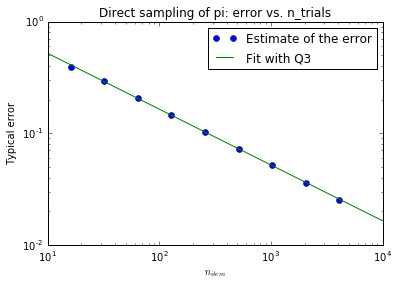

In [7]:
def direct_pi(N): # compute pi by direct sampling
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 1000
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_estimator = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_estimator - math.pi) ** 2 
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

pylab.plot(n_trials_list, sigmasqs, 'o',label='Estimate of the error')
# fit of the data
pylab.plot([10.0, 10000.0], [1.64 / math.sqrt(10.0), 1.64 / math.sqrt(10000.0)],label='Fit with Q3')
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('$n_{item}$')
pylab.ylabel('Typical error')
pylab.title('Direct sampling of pi: error vs. n_trials')
plt.legend()
pylab.show()

As we can observe, the variance and error of our estimator is close to the one predicted by Q3. Indeed the fit with the straight line in log-log scale seems very accurate.

## Sampling $\pi$ with MCMC

We now implement the MCMC strategy where we have one single path. We will add that in this procedure, if we fall outside the circle, we have to stay inside and count it as a trial anyway.

pi is approximatily 2.704


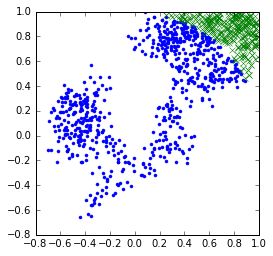

pi is approximatily 3.265


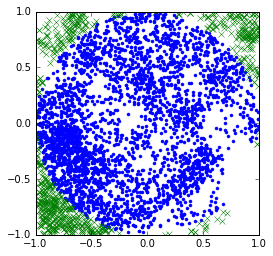

pi is approximatily 3.2614


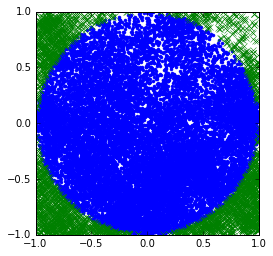

In [98]:
x0,y0 = 0,0
step_size = 0.1 
n_trials_list = [1000,4000,20000]

for n_trials in n_trials_list :

 n_inside = 0

 data_inside_x = []
 data_inside_y = []
 data_outside_x = []
 data_outside_y = []

 for i in range(n_trials):
    #now we move randomly with our step size
    del_x, del_y = random.uniform(-step_size, step_size), random.uniform(-step_size, step_size)
    if abs(x0 + del_x) < 1.0 and abs(y0 + del_y) < 1.0:
        x0, y0 = x0 + del_x, y0 + del_y
        #if we are still inside the square, we move
    if x0**2 + y0**2 < 1.0: 
        n_inside += 1
        #if we are still inside the circle, we count it
        data_inside_x.append(x0)
        data_inside_y.append(y0)
    else:
        data_outside_x.append(x0)
        data_outside_y.append(y0)

 print ("pi is approximatily", 4.0 * n_inside / float(n_trials))

 plt.plot(data_inside_x,data_inside_y,'.')
 plt.plot(data_outside_x,data_outside_y,'x')
 plt.axes().set_aspect('equal')
 plt.show()


We can observe that the increase of the number of trials leads to a better repartition in the square and thus to a better estimation of $\pi$. But when $N$ is small, the estiamtion is really bad.

Now we have interest in the variance of our estimator, and the acceptance probability for several values of the stepsize in order to choose the best.

In [6]:

x, y = 1.0, 1.0
delta_list = [0.062, 0.125, 0.25, 0.5, 1.18, 2.0, 4.0]
n_trials = 2**12
n_hits = 0
print ('stepsize' , '    Acceptance probability')
for delta in delta_list :
 n_hits=0 
 n_accepted=0
 for i in range(n_trials):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
        n_accepted +=1
    if x**2 + y**2 < 1.0: n_hits += 1

 print (delta ,'       ', n_accepted/n_trials)

stepsize     Acceptance probability
0.062         0.980712890625
0.125         0.94287109375
0.25         0.89013671875
0.5         0.773193359375
1.18         0.500244140625
2.0         0.251708984375
4.0         0.06396484375


The stepsize we will used now is $\delta = 1.18$. As we can see the estimation of $\pi$ converges a lot faster than for the original step-size. This seems a good point for this thumb rule

pi is approximatily 3.052


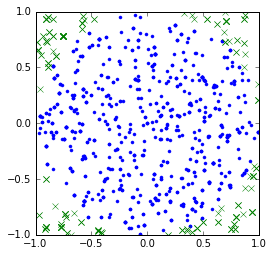

pi is approximatily 3.089


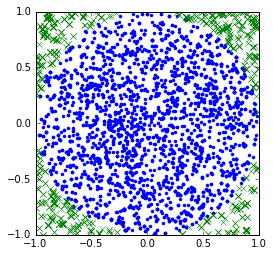

pi is approximatily 3.121


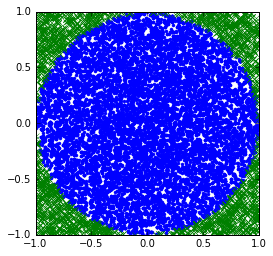

In [7]:
x0,y0 = 0,0
step_size = 1.18 
n_trials_list = [1000,4000,20000]

for n_trials in n_trials_list :

 n_inside = 0

 data_inside_x = []
 data_inside_y = []
 data_outside_x = []
 data_outside_y = []

 for i in range(n_trials):
    #now we move randomly with our step size
    del_x, del_y = random.uniform(-step_size, step_size), random.uniform(-step_size, step_size)
    if abs(x0 + del_x) < 1.0 and abs(y0 + del_y) < 1.0:
        x0, y0 = x0 + del_x, y0 + del_y
        #if we are still inside the square, we move
    if x0**2 + y0**2 < 1.0: 
        n_inside += 1
        #if we are still inside the circle, we count it
        data_inside_x.append(x0)
        data_inside_y.append(y0)
    else:
        data_outside_x.append(x0)
        data_outside_y.append(y0)

 print ("pi is approximatily", 4.0 * n_inside / float(n_trials))

 plt.plot(data_inside_x,data_inside_y,'.')
 plt.plot(data_outside_x,data_outside_y,'x')
 plt.axes().set_aspect('equal')
 plt.show()


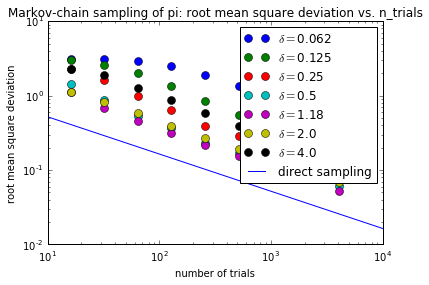

In [8]:
import random, math, pylab

def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.18, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            pi_estimator = 4.0 * markov_pi(n_trials, delta) / float(n_trials)
            sigma += (pi_estimator - math.pi) ** 2
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label = 'direct sampling')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right')
pylab.show()

Here we have plot the variance of our estimator for several values of the stepsize. And as we can observe the best one is for the thumb rule. But the error made by the estimator is very dependant of the value of $\delta$. Thus we don't have the formula from Q.2.3. In fact the error we are doing is always larger than the one from direct sampling, for any value of $\delta$.

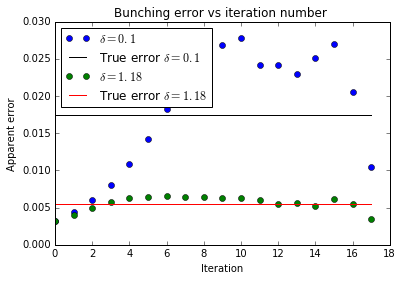

In [50]:
import random, pylab, math

def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data


# Stepsize = 0.1
# Bunching procedure
poweroftwo = 18
n_trials = 2 ** poweroftwo # easier for bunching
delta = 0.1
data = markov_pi_all_data(n_trials, delta)
errors  = []
bunches = []
for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    while data != []:
        x = data.pop() # pop some elements from the list
        y = data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    errors.append(math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N))
    bunches.append(i)
    data = new_data[:]
    
pylab.plot(bunches, errors, 'bo',label='$\delta = 0.1$')
pylab.plot(bunches,numpy.zeros(len(bunches))+numpy.absolute(mean/float(N)-math.pi),'k',label='True error $\delta = 0.1$')
pylab.xlabel('Iteration')
pylab.ylabel('Apparent error')
pylab.title('Bunching error vs iteration number ')

#Delta = 1.0

delta = 1.18
data = markov_pi_all_data(n_trials, delta)
datatrue = data
errors  = []
bunches = []
for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    while data != []:
        x = data.pop()
        y = data.pop()
        mean += (x + y)
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    errors.append(math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N))
    bunches.append(i)
    data = new_data[:]
    
pylab.plot(bunches, errors, 'go',label='$\delta = 1.18$')
pylab.plot(bunches,numpy.zeros(len(bunches))+numpy.absolute(mean/float(N) - math.pi),'r',label='True error $\delta = 1.18$')
plt.legend(loc=2)
pylab.show()





pylab.show()

The error we are comuting with the bunching method seems indeed to be analog to the true error of the Markov chain. THus this method seems to predict the error accurately, and this independtly of $ \delta$ the step-size. But the error is smaller for a good choice of the step-size.

The idea of the bunching method is to make the date uncorellated. Indeed at each run of this method we are computing the error as if the data were independent, with a mean value unchanged.
Thus bunching makes the data becomes more and more independent and approaching the true error of a Markov Chain. 
##### Why are the bunches less correlated ? 
The idea is that a the $k$ iterations, the bunches generated are from size $2^k$. If we suppose that the data are correlated on a scale $\xi$ but that for distance larger than $\xi$ the data are uncorellated. Thus if $\xi \leq 2^k$, after the $k$ iterations, the correlation does not affect next nearest bunches and we have kind of produced uncorelalted datas.

##### Plateau :

On the figure we can observe sevaral regimes. The first one is an increase of the error, corresponding to the increase of the independance between the data. The plateau, second regime, is explained by the fact that the bunching of uncorellated data does not change the variance of the data, and thus the error. This explain the plateau, because after the correlation size, we have uncorellated datas. The variations after are only the noise in the error estimate. 